In [1]:
import numpy as np
from glob import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
from satpy.multiscene import timeseries
from matplotlib.patches import Rectangle
from pyresample.geometry import AreaDefinition
import mpl_toolkits.axes_grid1.inset_locator as il
from cartopy.io.shapereader import Reader as Reader
from satpy import Scene, MultiScene, available_readers

In [2]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

In [3]:
# define the plotting region
#   min lon, min lat, max lon, max lat
extent = [106.5, 17.0, 114.5, 24]
# assign filenames
filenames = glob('FY4A-_AGRI--_N_REGC_1047E_L1-_FDI-_MULT_NOM_20190526004917*')
# use agri_l1 reader
scene = Scene(filenames=filenames,reader='agri_l1')
# load data
ch = 'C02'
scene.load([ch],resolution=500)
crs = scene[ch].area.to_cartopy_crs()

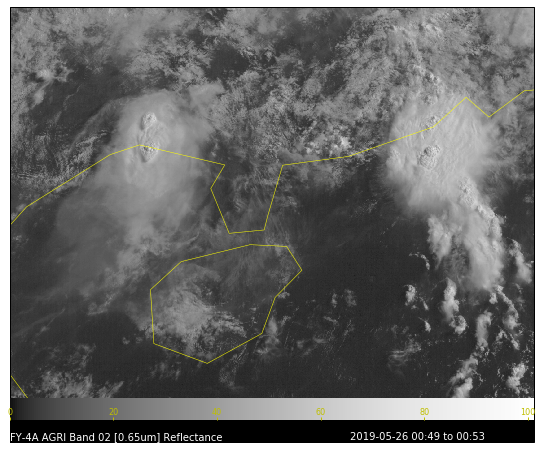

In [4]:
# plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1,1,1,projection=crs)
cmap = 'pink'

# draw coastlines
ax.coastlines(color='yellow',linewidth=0.5)
# ax.add_geometries(Reader('/home/xin/Research/python/shapefile/data/CHN_adm_shp/CHN_adm1.shp').geometries(),\
    # ccrs.PlateCarree(), edgecolor='grey', facecolor='none',linewidth=0.3)
ax.set_extent([extent[0], extent[2],extent[1], extent[3]],crs=ccrs.PlateCarree())

# plot data
im = plt.imshow(scene[ch],origin='upper',transform=crs,extent=crs.bounds, cmap=grayify_cmap(cmap))

# Insert the colorbar at the bottom
cb = plt.colorbar(im, orientation='horizontal', cax =  il.inset_axes(ax, "100%", "100%", loc=3, borderpad=0,\
bbox_to_anchor=(0,0.05,1,0.05),bbox_transform=ax.transAxes,))#[left, bottom, width, height] 
# Remove the colorbar outline
cb.outline.set_visible(False)
# set the colorbar ticks
cb.ax.tick_params(width = 1)
# Put the colobar labels inside the colorbar
cb.ax.xaxis.set_tick_params(pad=-12)
# Change the color and size of the colorbar labels
cb.ax.tick_params(axis='x', colors='y', labelsize=8, direction='in')

# Add a black rectangle in the bottom to insert the image description
ax.add_patch(Rectangle((0, 0), 1, 0.05, alpha=1, zorder=3, facecolor='black', transform=ax.transAxes))
# read attrs and set title
wavelength = scene[ch].attrs['center_wavelength']
band = scene[ch].attrs['name'][-2:]
start_time =  scene[ch].attrs['start_time'].strftime("%Y-%m-%d %H:%M")
end_time =  scene[ch].attrs['end_time'].strftime("%H:%M")
title_1 = "FY-4A AGRI Band " + band + ' [' + wavelength + '] Reflectance'
title_2 = start_time + " to " + end_time
t_1 = plt.text(0, 0.005, title_1, color = 'white', size=10, transform=ax.transAxes)
t_2 = plt.text(0.65, 0.005, title_2, color = 'white', size=10, transform=ax.transAxes)